In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv("/content/pumpkin.csv", encoding='latin-1')
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [20]:
df.isna().sum()

,0
Area,0
Perimeter,0
Major_Axis_Length,0
Minor_Axis_Length,0
Convex_Area,0
Equiv_Diameter,0
Eccentricity,0
Solidity,0
Extent,0
Roundness,0


In [21]:
df.duplicated().sum()

np.int64(0)

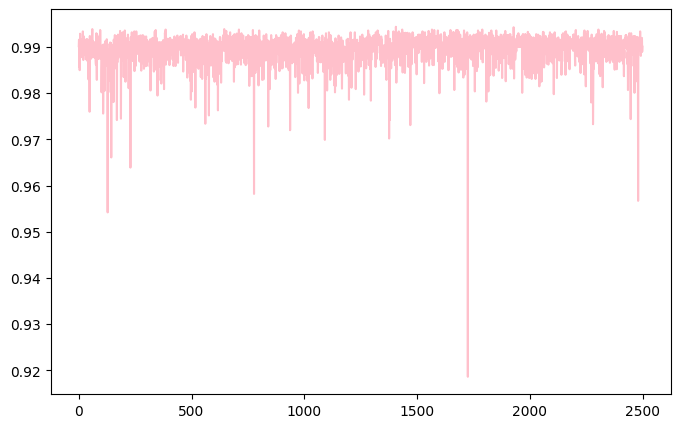

In [24]:
plt.figure(figsize=(8,5))
plt.plot(df['Solidity'],color="pink")
plt.show()

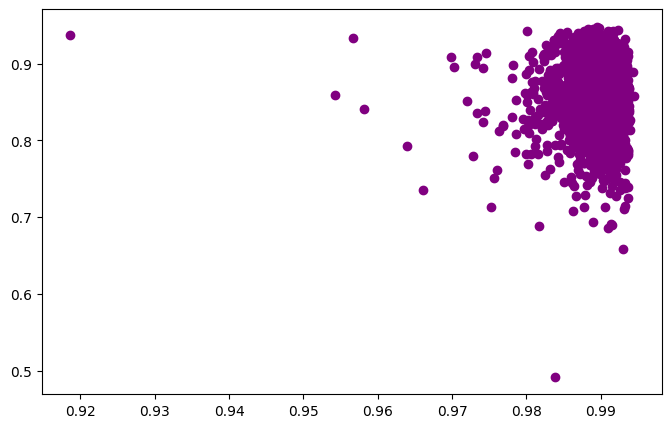

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(df['Solidity'], df['Eccentricity'], color="purple")
plt.show()

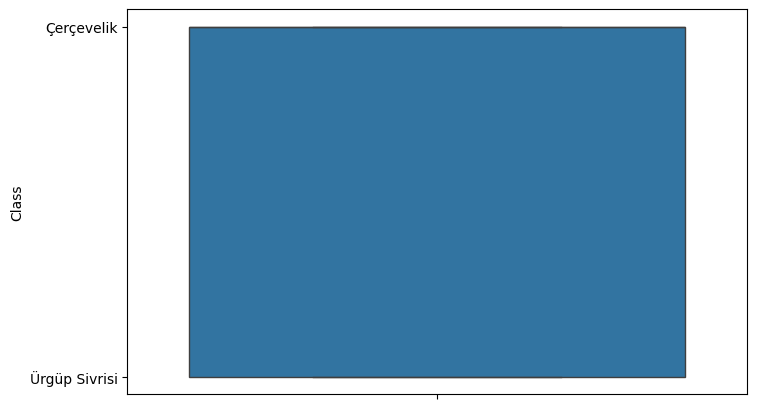

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(df['Class'])
plt.show()

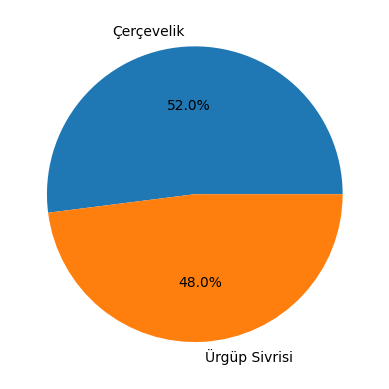

In [36]:
plt.pie(df['Class'].value_counts(), labels=df['Class'].value_counts().index, autopct='%1.1f%%')
plt.show()

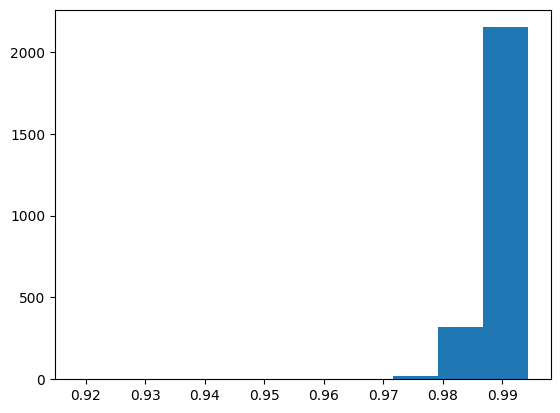

In [37]:
plt.hist(df['Solidity'], bins=10)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

In [40]:
df['class']=LabelEncoder().fit_transform(df['Class'])
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class,class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik,0


In [42]:
x = df.drop(columns=['Class'])
y=df['Class']

In [43]:
x.shape

(2500, 13)

In [44]:
y.shape

(2500,)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [47]:
sc

StandardScaler()

In [48]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [49]:
x_train_scaled

array([[-0.59151048, -0.19099892,  0.26252393, ...,  1.11817017,
        -1.11336298,  1.0502616 ],
       [-0.17248407, -0.0063621 ,  0.24017202, ...,  0.5417128 ,
        -0.61142642,  1.0502616 ],
       [-0.36081386,  0.08584639,  0.38382984, ...,  0.94337138,
        -1.03064685,  1.0502616 ],
       ...,
       [ 1.01872392,  0.50059685,  0.03541268, ..., -0.95133388,
         0.98461907, -0.95214374],
       [ 0.06572805, -0.08371392, -0.18802814, ..., -0.42441335,
         0.343569  , -0.95214374],
       [-0.113981  , -0.11251133, -0.07945305, ..., -0.05336033,
        -0.04181301, -0.95214374]])

In [50]:
x_test_scaled

array([[-1.09409164, -0.93410761, -0.60730142, ...,  0.23849685,
        -0.36139809,  1.0502616 ],
       [-0.49778767, -0.46603981, -0.38596638, ..., -0.12214397,
         0.0202241 , -0.95214374],
       [ 0.01569835, -0.20600215, -0.35266546, ..., -0.61972102,
         0.57479821, -0.95214374],
       ...,
       [-0.25765983, -0.19190571, -0.09765748, ...,  0.06369807,
        -0.17716669, -0.95214374],
       [ 0.81632098,  0.57449554,  0.53484988, ..., -0.11173176,
        -0.03429336, -0.95214374],
       [-0.19156757, -0.0162635 ,  0.12150235, ...,  0.34261887,
        -0.45163388,  1.0502616 ]])

In [51]:
model=SVC(kernel='linear',C=1.0)
model.fit(x_train_scaled,y_train)

SVC(kernel='linear')

In [52]:
y_pred=model.predict(x_test_scaled)
y_pred

array(['Ürgüp Sivrisi', 'Çerçevelik', 'Çerçevelik', 'Ürgüp Sivrisi',
       'Ürgüp Sivrisi', 'Çerçevelik', 'Ürgüp Sivrisi', 'Ürgüp Sivrisi',
       'Çerçevelik', 'Ürgüp Sivrisi', 'Çerçevelik', 'Çerçevelik',
       'Çerçevelik', 'Çerçevelik', 'Çerçevelik', 'Çerçevelik',
       'Ürgüp Sivrisi', 'Ürgüp Sivrisi', 'Çerçevelik', 'Çerçevelik',
       'Ürgüp Sivrisi', 'Çerçevelik', 'Ürgüp Sivrisi', 'Ürgüp Sivrisi',
       'Çerçevelik', 'Çerçevelik', 'Çerçevelik', 'Çerçevelik',
       'Ürgüp Sivrisi', 'Çerçevelik', 'Ürgüp Sivrisi', 'Çerçevelik',
       'Çerçevelik', 'Ürgüp Sivrisi', 'Çerçevelik', 'Çerçevelik',
       'Ürgüp Sivrisi', 'Ürgüp Sivrisi', 'Ürgüp Sivrisi', 'Çerçevelik',
       'Ürgüp Sivrisi', 'Çerçevelik', 'Ürgüp Sivrisi', 'Çerçevelik',
       'Çerçevelik', 'Ürgüp Sivrisi', 'Ürgüp Sivrisi', 'Çerçevelik',
       'Ürgüp Sivrisi', 'Ürgüp Sivrisi', 'Çerçevelik', 'Ürgüp Sivrisi',
       'Çerçevelik', 'Çerçevelik', 'Çerçevelik', 'Çerçevelik',
       'Çerçevelik', 'Çerçevelik', 'Ürgüp Sivr

In [53]:
accuracy_score(y_test,y_pred)

1.0

In [54]:
classification_report(y_test,y_pred)

'               precision    recall  f1-score   support\n\n   Çerçevelik       1.00      1.00      1.00       251\nÜrgüp Sivrisi       1.00      1.00      1.00       249\n\n     accuracy                           1.00       500\n    macro avg       1.00      1.00      1.00       500\n weighted avg       1.00      1.00      1.00       500\n'

In [55]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[251,   0],
       [  0, 249]])

<Axes: >

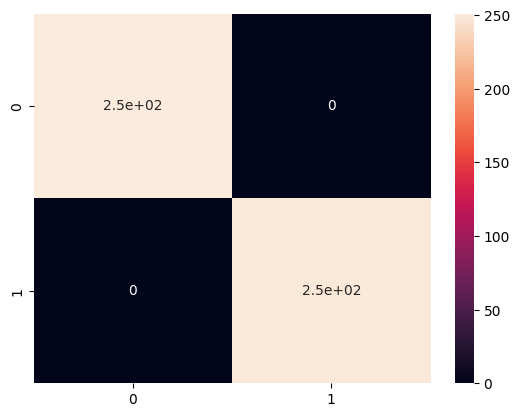

In [56]:
sns.heatmap(cm,annot=True)


<Axes: >

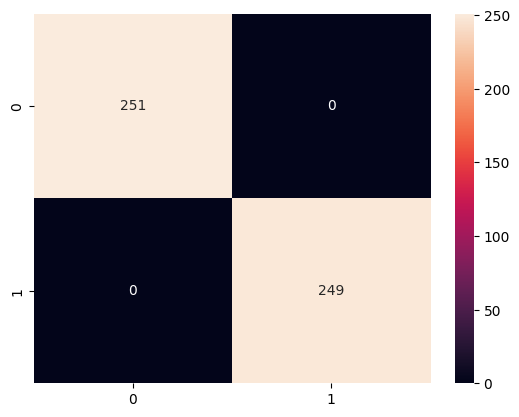

In [60]:
sns.heatmap(cm,annot=True,fmt='d')

<Axes: >

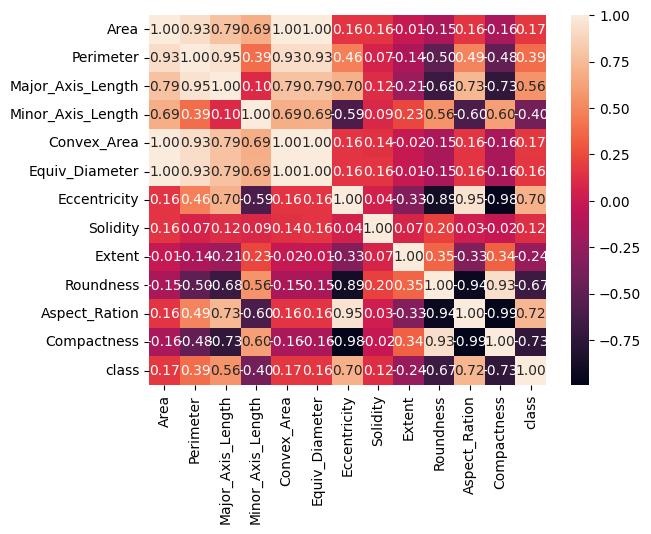

In [63]:
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

In [68]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(x_test_scaled)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(classification_report(y_test, y_pred_nb))



Naive Bayes Accuracy: 1.0
               precision    recall  f1-score   support

   Çerçevelik       1.00      1.00      1.00       251
Ürgüp Sivrisi       1.00      1.00      1.00       249

     accuracy                           1.00       500
    macro avg       1.00      1.00      1.00       500
 weighted avg       1.00      1.00      1.00       500



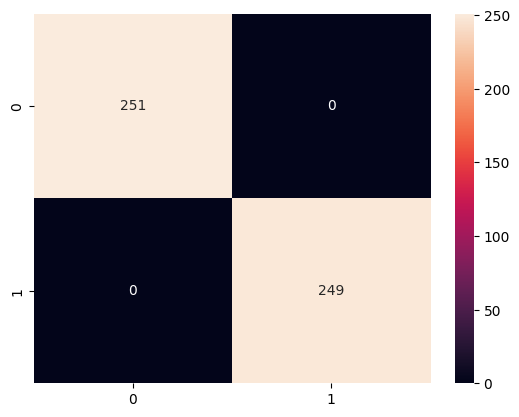

In [69]:
# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d')
plt.show()

In [70]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)  # You can adjust hyperparameters if needed
lr_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(x_test_scaled)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 1.0
               precision    recall  f1-score   support

   Çerçevelik       1.00      1.00      1.00       251
Ürgüp Sivrisi       1.00      1.00      1.00       249

     accuracy                           1.00       500
    macro avg       1.00      1.00      1.00       500
 weighted avg       1.00      1.00      1.00       500



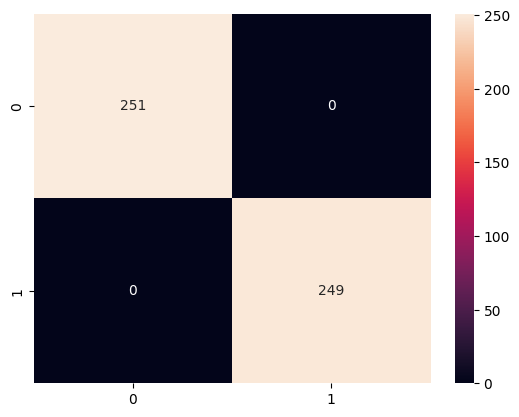

In [71]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.show()

In [72]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(x_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.996
               precision    recall  f1-score   support

   Çerçevelik       1.00      1.00      1.00       251
Ürgüp Sivrisi       1.00      1.00      1.00       249

     accuracy                           1.00       500
    macro avg       1.00      1.00      1.00       500
 weighted avg       1.00      1.00      1.00       500



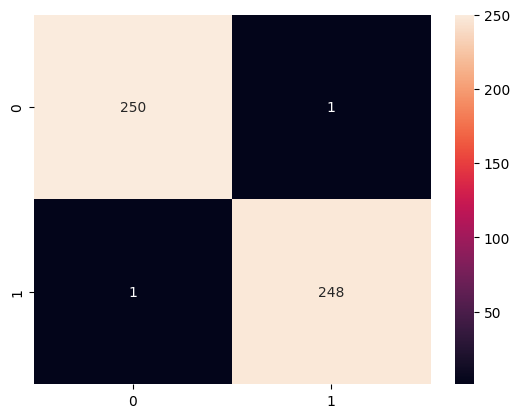

In [73]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.show()

In [75]:
import joblib

In [88]:
joblib.dump(model,'ridz661.pkl')

['ridz661.pkl']

In [89]:
model=joblib.load("/content/ridz661.pkl")

In [85]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.8 MB/s eta 0:00:00


In [90]:

import gradio as gr
# Define the prediction function
def predict_pumpkin(
    Area, Perimeter, Major_Axis_Length, Minor_Axis_Length,
    Convex_Area, Equiv_Diameter, Eccentricity, Solidity, Extent,
    Roundness, Aspect_Ration, Compactness
):
    input_data = np.array([[
        Area, Perimeter, Major_Axis_Length, Minor_Axis_Length,
        Convex_Area, Equiv_Diameter, Eccentricity, Solidity, Extent,
        Roundness, Aspect_Ration, Compactness
    ]])

    prediction = model.predict(input_data)

    # Assuming 'Çerkes' = 0 and 'Ürgüp Sivrisi' = 1
    return "Çerkes" if prediction[0] == 0 else "Ürgüp Sivrisi"



In [91]:
# Define Gradio input components

inputs = [
    gr.Number(label="Area"),
    gr.Number(label="Perimeter"),
    gr.Number(label="Major Axis Length"),
    gr.Number(label="Minor Axis Length"),
    gr.Number(label="Convex Area"),
    gr.Number(label="Equiv Diameter"),
    gr.Number(label="Eccentricity"),
    gr.Number(label="Solidity"),
    gr.Number(label="Extent"),
    gr.Number(label="Roundness"),
    gr.Number(label="Aspect Ratio"),
    gr.Number(label="Compactness"),
]

# Create and launch Gradio interface
demo = gr.Interface(
    fn=predict_pumpkin,
    inputs=inputs,
    outputs="text",
    title="🎃 Pumpkin Seed Classifier using SVM",
    description="Enter the geometric features of a pumpkin seed to predict whether it's Çerkes or Ürgüp Sivrisi."
)

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://84e33f5227484075c6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
